<a href="https://colab.research.google.com/github/LaxmanSudhan/Forecasting-Day-Ahead-Electricity-Metrics-/blob/main/Electricity_Price_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EXPLORATORY DATA ANALYSIS

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import imageio
import os
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [ ]:
df=pd.read_csv("/content/mid-gas-2017-2019.csv",index_col=[0], parse_dates=[0])
df.head(3)

,Price,Volume,Settlement Period,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,SAP,EU_ETS,Gas
datetime,,,,,,,,,,,,,,
2017-01-01 00:00:00,44.90,505.00,1,0.0,Sun,1.0,Jan,2017.0,1.0,1.0,52.0,16.95,1.033832,21.294832
2017-01-01 00:30:00,47.13,559.15,2,0.0,Sun,1.0,Jan,2017.0,1.0,1.0,52.0,16.95,1.033832,21.294832
2017-01-01 01:00:00,45.62,649.35,3,1.0,Sun,1.0,Jan,2017.0,1.0,1.0,52.0,16.95,1.033832,21.294832


In [ ]:
df_indo = pd.read_csv("/content/INDO-2017-2019.csv",index_col=[0],parse_dates = [0])
df_indo.head()

,Settlement_Period,INDO
datetime,,
2017-01-01 00:00:00,1,27239
2017-01-01 00:30:00,2,27814
2017-01-01 01:00:00,3,27453
2017-01-01 01:30:00,4,26312
2017-01-01 02:00:00,5,25289


In [ ]:
df_itdso = pd.read_csv("/content/ITSDO-2017-2019.csv",index_col=[0],parse_dates = [0])
df_itdso.head()

,Settlement Period,ITSDO
datetime,,
2017-01-01 00:00:00,1,27949
2017-01-01 00:30:00,2,28435
2017-01-01 01:00:00,3,28165
2017-01-01 01:30:00,4,27707
2017-01-01 02:00:00,5,27449


In [ ]:
df=pd.merge(df,df_indo['INDO'], how='inner', left_index=True, right_index=True)
df=pd.merge(df,df_itdso['ITSDO'], how='inner', left_index=True, right_index=True)

In [ ]:
print(df.shape)
df.tail()

(43391, 18)


,Price,Volume,Settlement Period,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,SAP,EU_ETS,Gas,INDO_x,INDO_y,INDO,ITSDO
datetime,,,,,,,,,,,,,,,,,,
2019-07-01 21:30:00,55.31,1423.25,44,21.0,Mon,3.0,Jul,2019.0,182.0,1.0,27.0,9.05,4.338429,16.701429,27987,27987,27987,28498
2019-07-01 22:00:00,55.69,1429.55,45,22.0,Mon,3.0,Jul,2019.0,182.0,1.0,27.0,9.05,4.338429,16.701429,27380,27380,27380,27914
2019-07-01 22:30:00,46.23,1572.85,46,22.0,Mon,3.0,Jul,2019.0,182.0,1.0,27.0,9.05,4.338429,16.701429,26245,26245,26245,26760
2019-07-01 23:00:00,34.96,917.05,47,23.0,Mon,3.0,Jul,2019.0,182.0,1.0,27.0,9.05,4.338429,16.701429,24499,24499,24499,25015
2019-07-01 23:30:00,43.85,828.65,48,23.0,Mon,3.0,Jul,2019.0,182.0,1.0,27.0,9.05,4.338429,16.701429,22940,22940,22940,23452


In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,Price,Volume,Settlement Period,hour,quarter,year,dayofyear,dayofmonth,weekofyear,SAP,EU_ETS,Gas,INDO_x,INDO_y,INDO,ITSDO
Price,1.000000,0.170764,0.254346,0.254757,0.129036,0.105262,0.127060,-0.019608,0.126961,0.609980,0.187125,0.622183,0.504496,0.504496,0.504496,0.495327
Volume,0.170764,1.000000,0.517171,0.515865,-0.033238,0.111798,-0.032562,-0.025588,-0.031837,0.041247,0.076343,0.055125,0.389849,0.389849,0.389849,0.364098
Settlement Period,0.254346,0.517171,1.000000,0.999347,-0.001603,0.001354,-0.001358,0.000690,-0.001361,0.000476,0.000735,0.000606,0.468902,0.468902,0.468902,0.424307
hour,0.254757,0.515865,0.999347,1.000000,-0.001584,0.001342,-0.001340,0.000696,-0.001343,0.000426,0.000731,0.000558,0.469320,0.469320,0.469320,0.424684
quarter,0.129036,-0.033238,-0.001603,-0.001584,1.000000,-0.290439,0.967300,0.012652,0.956788,0.177560,0.054973,0.181188,-0.156743,-0.156743,-0.156743,-0.147701
year,0.105262,0.111798,0.001354,0.001342,-0.290439,1.000000,-0.282519,-0.008974,-0.281110,0.007505,0.900316,0.191672,-0.020276,-0.020276,-0.020276,-0.035806
dayofyear,0.127060,-0.032562,-0.001358,-0.001340,0.967300,-0.282519,1.000000,0.096067,0.986441,0.179166,0.072959,0.186412,-0.163689,-0.163689,-0.163689,-0.156328
dayofmonth,-0.019608,-0.025588,0.000690,0.000696,0.012652,-0.008974,0.096067,1.000000,0.083032,-0.054478,0.027955,-0.046409,-0.039177,-0.039177,-0.039177,-0.038770
weekofyear,0.126961,-0.031837,-0.001361,-0.001343,0.956788,-0.281110,0.986441,0.083032,1.000000,0.180045,0.069808,0.186606,-0.160023,-0.160023,-0.160023,-0.152631
SAP,0.609980,0.041247,0.000476,0.000426,0.177560,0.007505,0.179166,-0.054478,0.180045,1.000000,0.106765,0.979025,0.186568,0.186568,0.186568,0.202223


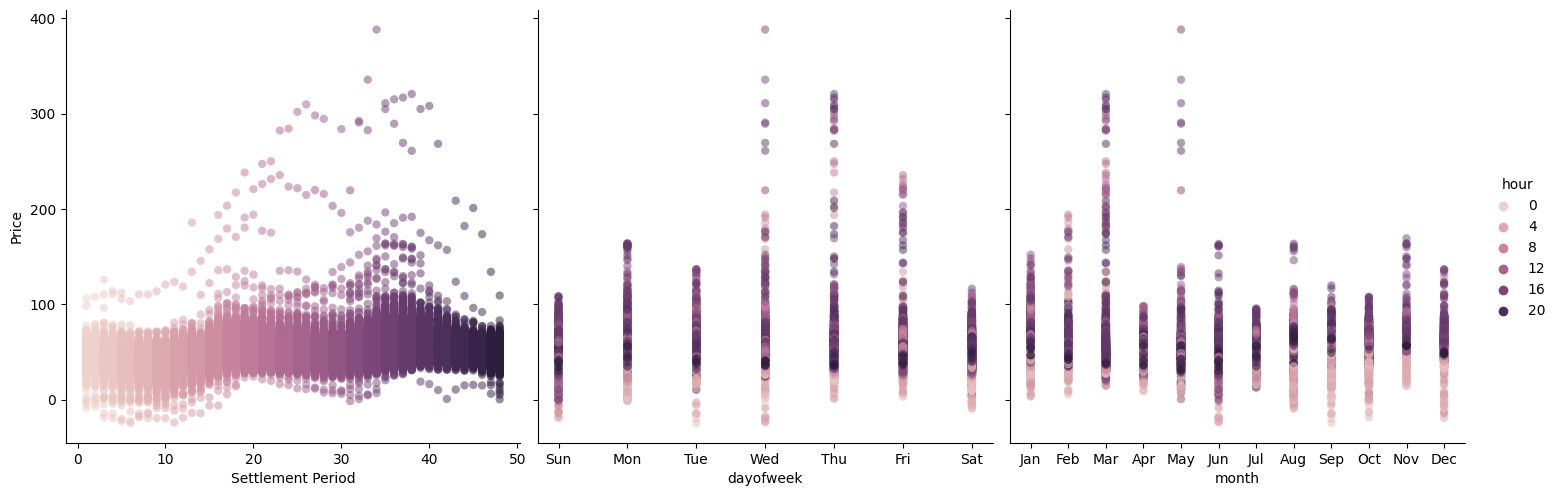

In [ ]:
sns.pairplot(df,hue = 'hour',x_vars=['Settlement Period','dayofweek','month'],y_vars='Price',height=5,plot_kws={'alpha':0.5, 'linewidth':0})
plt.show()

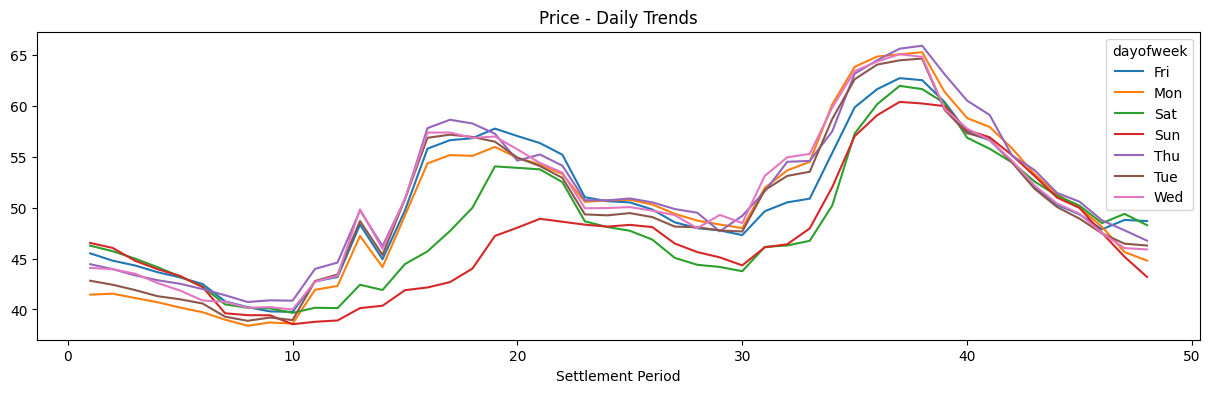

In [ ]:
df.pivot_table(index=df['Settlement Period'], columns='dayofweek', values='Price',aggfunc='mean').plot(figsize=(15,4),title='Price - Daily Trends')
plt.show()

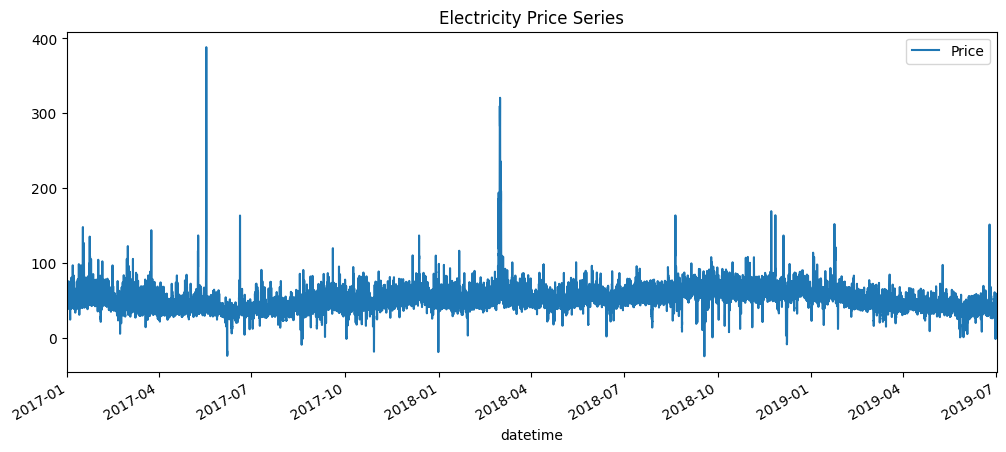

In [ ]:
title = 'Electricity Price Series'
ylabel = ''
xlabel = ''
ax = df['Price'].plot(figsize = (12,5),title = title,legend = True)
ax.autoscale(axis = 'x',tight = True)

[Text(0.5, 0, ''), Text(0, 0.5, '')]

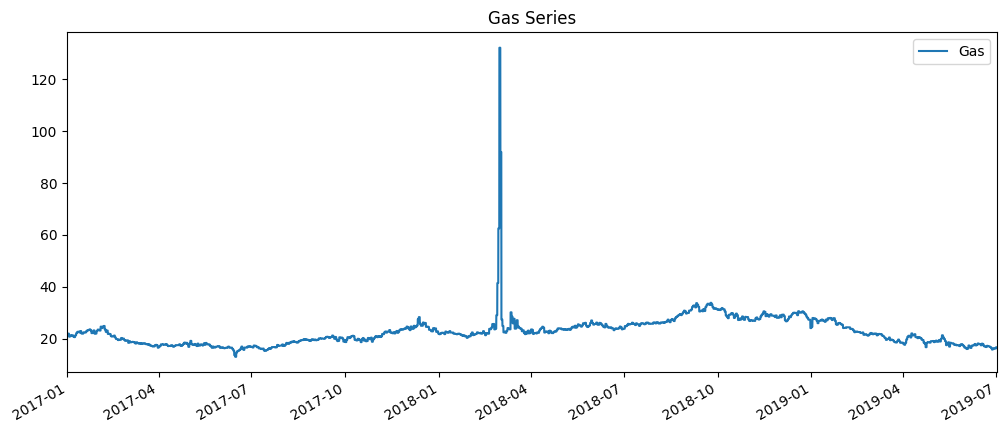

In [ ]:
title = 'Gas Series'
ylabel=''
xlabel=''
axs = df['Gas'].plot(figsize=(12,5),title=title,legend=True)
axs.autoscale(axis='x',tight=True)
axs.set(xlabel=xlabel, ylabel=ylabel)

[Text(0.5, 0, ''), Text(0, 0.5, '')]

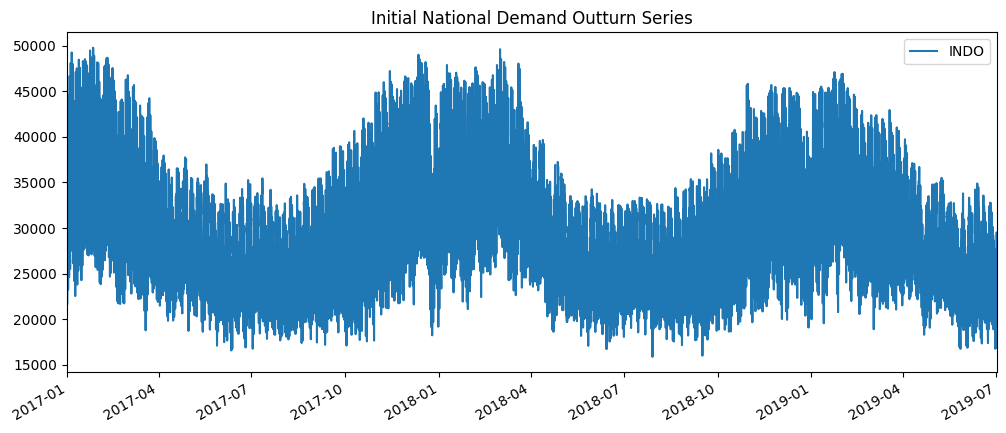

In [ ]:
title = 'Initial National Demand Outturn Series'
ylabel=''
xlabel=''
axi = df['INDO'].plot(figsize=(12,5),title=title,legend=True)
axi.autoscale(axis='x',tight=True)
axi.set(xlabel=xlabel, ylabel=ylabel)

<Axes: title={'center': 'INDO - March 2019'}, xlabel='datetime'>

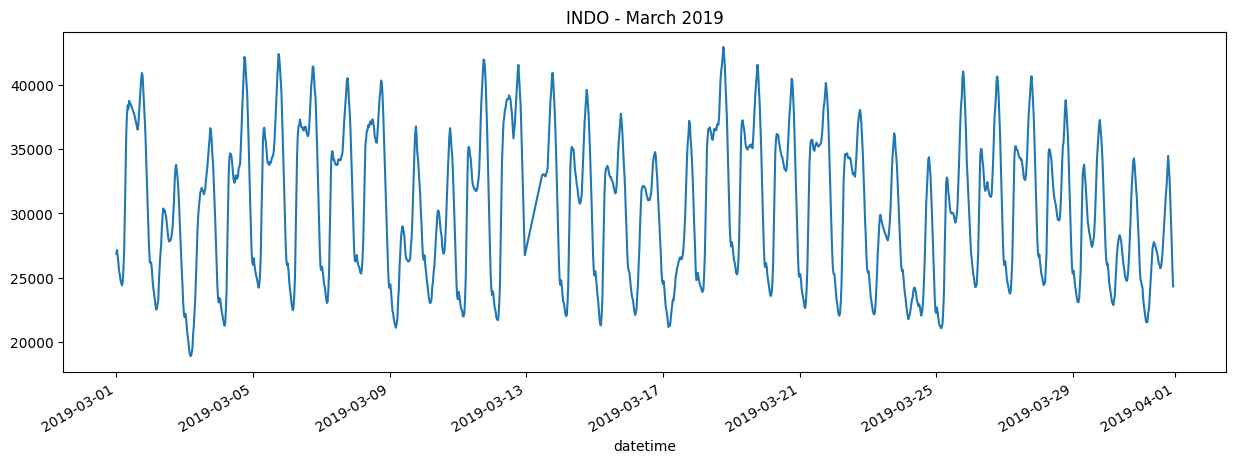

In [ ]:
df['INDO'].loc[(df['INDO'].index >= '2019-03-01') &(df['INDO'].index < '2019-04-01')] \
.plot(figsize=(15, 5), title = 'INDO - March 2019')

<Axes: title={'center': 'Initial Demand Outturn - 1st of March 2019'}, xlabel='datetime'>

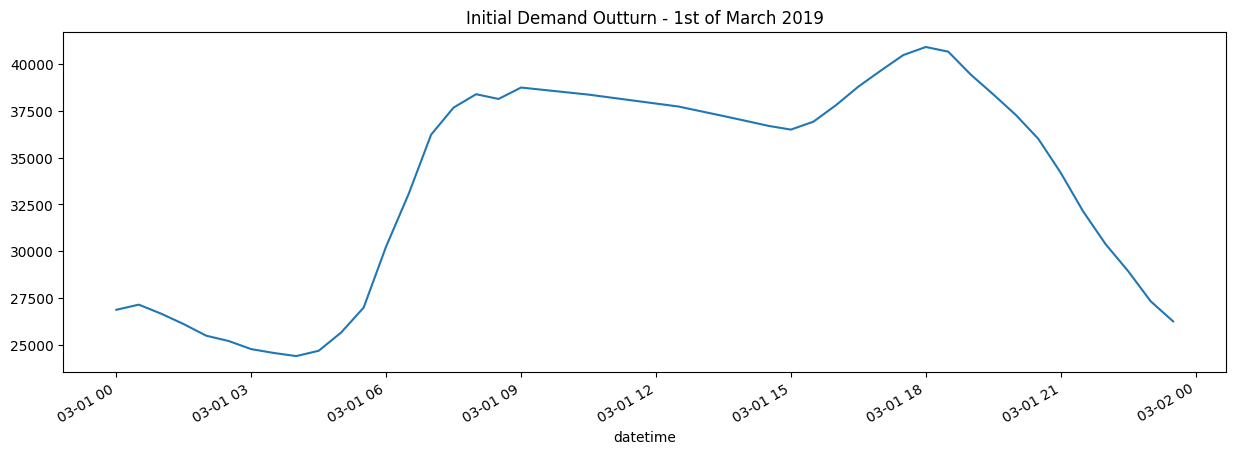

In [ ]:
df['INDO'].loc[(df['INDO'].index >= '2019-03-01') & (df['INDO'].index < '2019-03-02')] \
.plot(figsize=(15, 5), title = 'Initial Demand Outturn - 1st of March 2019')

<Axes: title={'center': 'Electricity prices - 1st of March 2019'}, xlabel='datetime'>

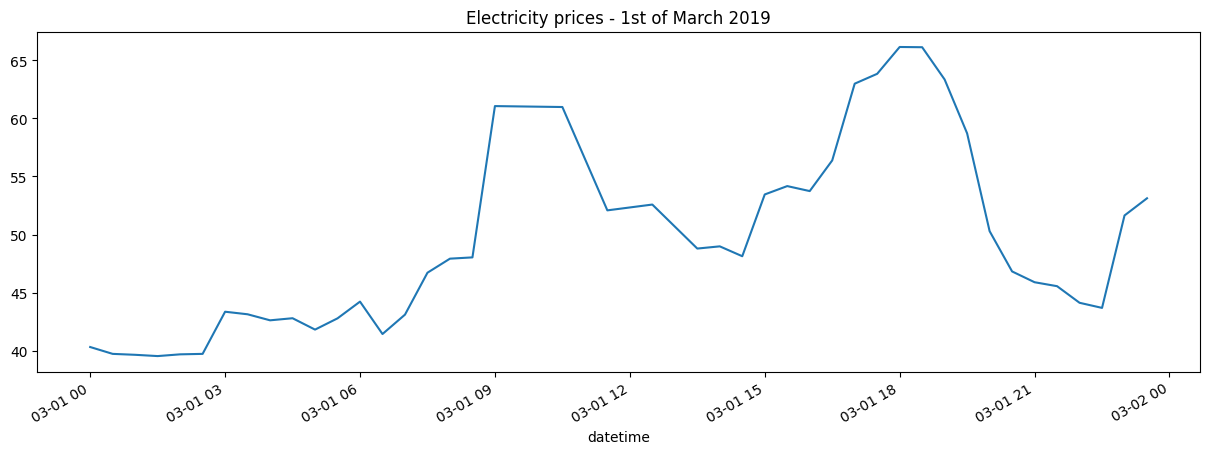

In [ ]:
df['Price'].loc[(df['Price'].index >= '2019-03-01') &(df['Price'].index < '2019-03-02')] \
.plot(figsize=(15, 5), title = 'Electricity prices - 1st of March 2019')

ARIMA MODELS - TIME SERIES TESTS


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX
!pip install pmdarima
from pmdarima import auto_arima
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.6 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv("/content/mid-2017-2019-datetime.csv", index_col=[0], parse_dates=[0])
df.head()

,Price,Volume,Settlement Period,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
datetime,,,,,,,,,,,
2017-01-01 00:00:00,44.90,505.00,1,0.0,Sun,1.0,Jan,2017.0,1.0,1.0,52.0
2017-01-01 00:30:00,47.13,559.15,2,0.0,Sun,1.0,Jan,2017.0,1.0,1.0,52.0
2017-01-01 01:00:00,45.62,649.35,3,1.0,Sun,1.0,Jan,2017.0,1.0,1.0,52.0
2017-01-01 01:30:00,44.05,712.65,4,1.0,Sun,1.0,Jan,2017.0,1.0,1.0,52.0
2017-01-01 02:00:00,44.83,599.15,5,2.0,Sun,1.0,Jan,2017.0,1.0,1.0,52.0


In [ ]:
df_gas = pd.read_csv("/content/gas_data.csv",index_col=[0], parse_dates=[0],encoding = "ISO-8859-1")
df_gas.head()

,SAP(£/MWh),EU ETS (£/MWh),Gas (£/MWh)
Date,,,
2016-01-01,10.44,1.099207,14.848207
2016-01-02,10.29,1.099207,14.700207
2016-01-03,10.44,1.099207,14.853207
2016-01-04,11.22,1.099207,15.635207
2016-01-05,11.25,1.090321,15.654321


In [ ]:
df2=pd.read_csv("/content/mid-gas-2017-2019.csv",index_col=[0], parse_dates=[0])
df2.head()

,Price,Volume,Settlement Period,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,SAP,EU_ETS,Gas
datetime,,,,,,,,,,,,,,
2017-01-01 00:00:00,44.90,505.00,1,0.0,Sun,1.0,Jan,2017.0,1.0,1.0,52.0,16.95,1.033832,21.294832
2017-01-01 00:30:00,47.13,559.15,2,0.0,Sun,1.0,Jan,2017.0,1.0,1.0,52.0,16.95,1.033832,21.294832
2017-01-01 01:00:00,45.62,649.35,3,1.0,Sun,1.0,Jan,2017.0,1.0,1.0,52.0,16.95,1.033832,21.294832
2017-01-01 01:30:00,44.05,712.65,4,1.0,Sun,1.0,Jan,2017.0,1.0,1.0,52.0,16.95,1.033832,21.294832
2017-01-01 02:00:00,44.83,599.15,5,2.0,Sun,1.0,Jan,2017.0,1.0,1.0,52.0,16.95,1.033832,21.294832


In [ ]:
df_indo=pd.read_csv('/content/INDO-2017-2019.csv',index_col=[0],parse_dates=[0])
df_indo.head(3)
df=pd.merge(df,df_indo['INDO'], how='inner', left_index=True, right_index=True)
df.head()

,Price,Volume,Settlement Period,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,INDO
datetime,,,,,,,,,,,,
2017-01-01 00:00:00,44.90,505.00,1,0.0,Sun,1.0,Jan,2017.0,1.0,1.0,52.0,27239
2017-01-01 00:30:00,47.13,559.15,2,0.0,Sun,1.0,Jan,2017.0,1.0,1.0,52.0,27814
2017-01-01 01:00:00,45.62,649.35,3,1.0,Sun,1.0,Jan,2017.0,1.0,1.0,52.0,27453
2017-01-01 01:30:00,44.05,712.65,4,1.0,Sun,1.0,Jan,2017.0,1.0,1.0,52.0,26312
2017-01-01 02:00:00,44.83,599.15,5,2.0,Sun,1.0,Jan,2017.0,1.0,1.0,52.0,25289


In [ ]:
def split_data(data, split_date):
    return data[data.index <= split_date].copy(),data[data.index >  split_date].copy()
def limit(data, frm, to):
    return data[(data.index>=frm)&(data.index<to)]

df.sort_index(inplace=True)

t = df.Price.copy()
t = t.drop(t.index[t.index.duplicated()])
freq_index = pd.date_range(start=t.index[0], end=t.index[-1], freq='30T')
constructed = pd.Series(index=freq_index, name='Price')
constructed.update(t)
constructed.interpolate(inplace=True)

i = df.INDO.copy()
i = i.drop(i.index[i.index.duplicated()])
freq_index = pd.date_range(start=i.index[0], end=i.index[-1], freq='30T')
constructed_indo = pd.Series(index=freq_index, name='INDO')
constructed_indo.update(i)
constructed_indo.interpolate(inplace=True)



In [ ]:
train = limit(constructed, '2019-01-01', '2019-06-15')
test  = limit(constructed, '2019-06-15', '2019-07-01')
test.shape, train.shape

((768,), (7920,))

In [ ]:
train_indo = limit(constructed_indo, '2019-01-01', '2019-06-15')
test_indo = limit(constructed_indo, '2019-06-15', '2019-07-01')
train_indo.shape,test_indo.shape

((7920,), (768,))

In [ ]:
test_indo = df[df.index.isin(test_indo.index)].copy()
test_indo[['INDO']].shape

(768, 1)

<Axes: title={'center': 'The UK electricity price time-series'}, xlabel='datetime'>

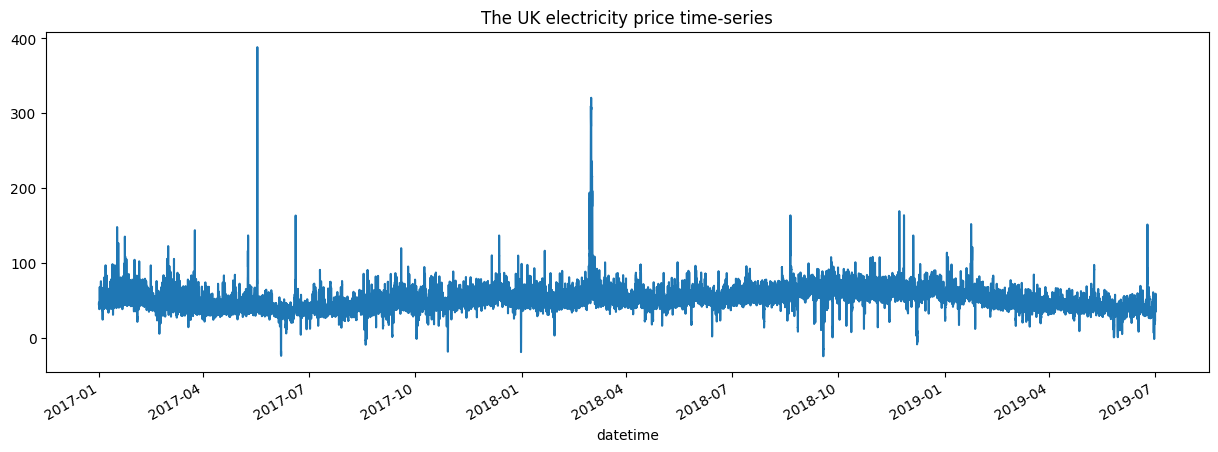

In [ ]:
df['Price'].plot(figsize=(15, 5), title = 'The UK electricity price time-series')

<Axes: title={'center': 'PRICE - July 2019'}, xlabel='datetime'>

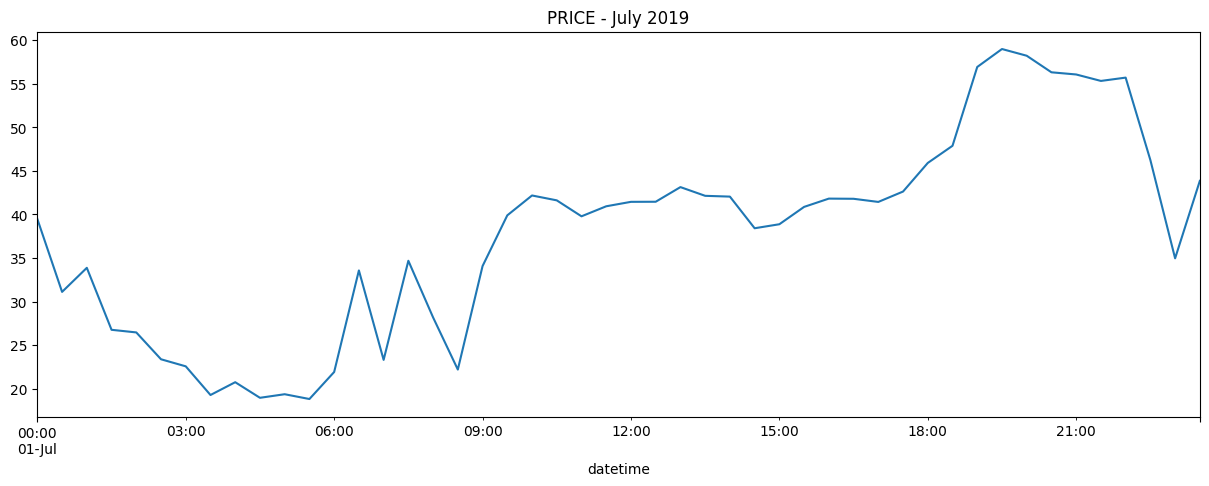

In [ ]:
df['Price'].loc[(df['Price'].index >= '2019-07-01') &(df['Price'].index < '2019-08-01')] \
    .plot(figsize=(15, 5), title = 'PRICE - July 2019')

<Axes: title={'center': 'VOLUME -July 2019'}, xlabel='datetime'>

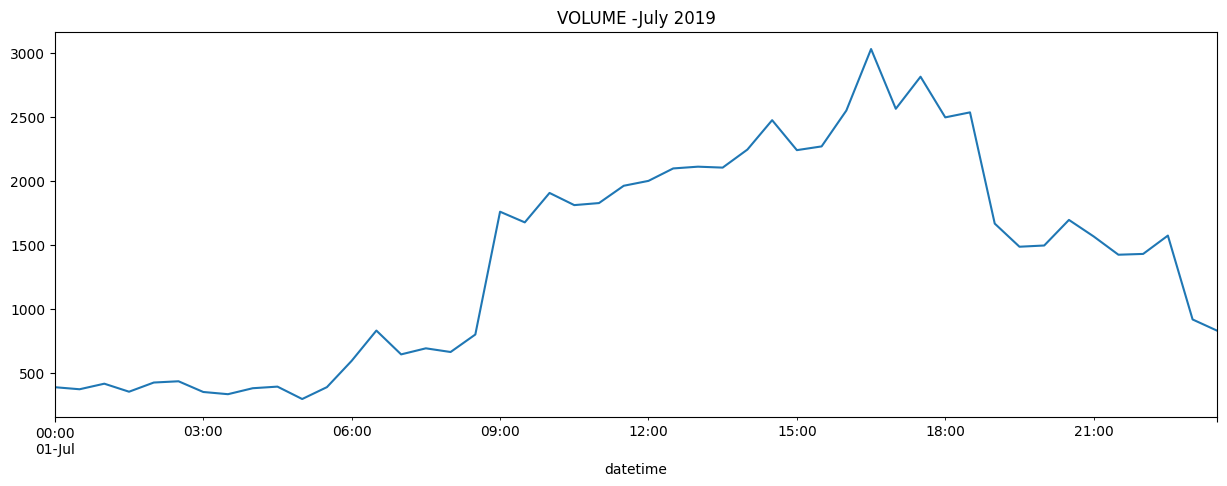

In [ ]:
df['Volume'].loc[(df['Volume'].index >= '2019-07-01') &(df['Price'].index < '2019-08-01')] \
    .plot(figsize=(15, 5), title = 'VOLUME -July 2019')

In [ ]:
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

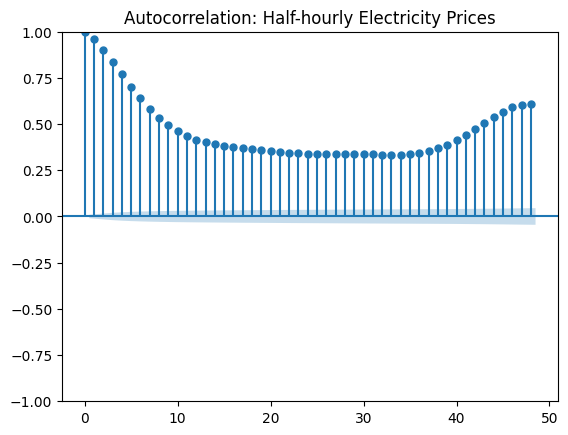

In [ ]:
title = 'Autocorrelation: Half-hourly Electricity Prices'
lags = 48
plot_acf(df['Price'],title=title,lags=lags);

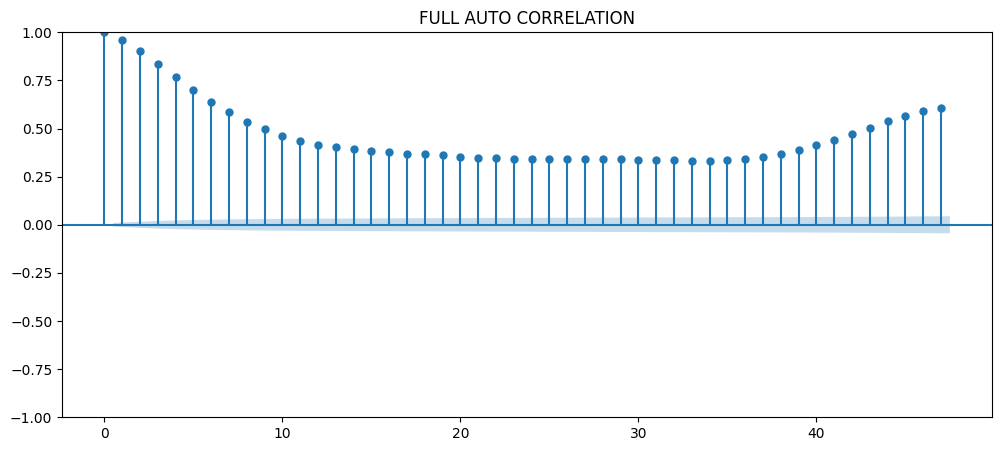

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,5))

plot_acf(df['Price'],ax=ax,title = 'FULL AUTO CORRELATION');

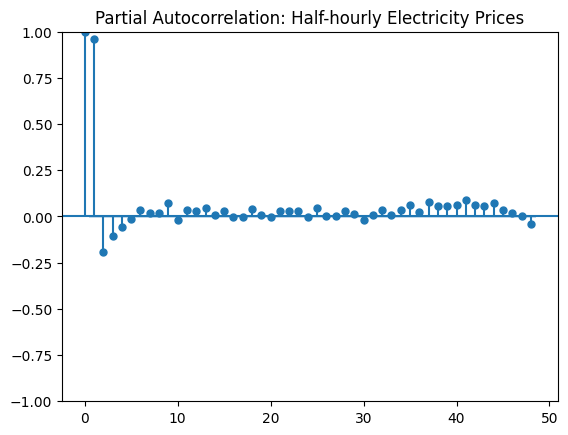

In [ ]:
title='Partial Autocorrelation: Half-hourly Electricity Prices'
lags=48
plot_pacf(df['Price'],title=title,lags=lags);

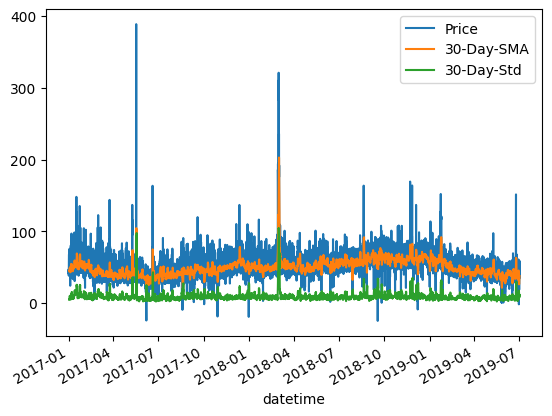

In [ ]:
df['30-Day-SMA'] = df['Price'].rolling(window=48).mean()
df['30-Day-Std'] = df['Price'].rolling(window=48).std()
df[['Price','30-Day-SMA','30-Day-Std']].plot();

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train,order=(5,1,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                 7920
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -20937.176
Date:                Sat, 22 Jul 2023   AIC                          41888.352
Time:                        13:41:32   BIC                          41937.191
Sample:                    01-01-2019   HQIC                         41905.077
                         - 06-14-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0559      0.008    131.418      0.000       1.040       1.072
ar.L2         -0.0173      0.010     -1.674      0.094      -0.038       0.003
ar.L3         -0.0401      0.014     -2.934      0.003      -0.067      -0.013
ar.L4         -0.0472      0.015     -3.250      0.001      -0.076      -0.019
ar.L5         -0.0526      0.009     -5.674      0.000      -0.071      -0.034
ma.L1         -0.9913      0.002   -653.862      0.000      -0.994      -0.988
sigma2        11.5852      0.088    130.940      0.000      11.412      11.759
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             25810.06
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                             0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start=len(train)
end=len(train)+len(test)-1
start
predictions = results.predict(start=start, end=end).rename('ARMA(5,1) Predictions')

title = 'Half Hourly Price Predictions'
ylabel='Price'
xlabel=''

ax = test.plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

MODEL EVALUATION

In [ ]:
from statsmodels.tools.eval_measures import mse,rmse
from sklearn.metrics import mean_absolute_error

error1 = mse(test, predictions)
error2 = rmse(test, predictions)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f'MAE Error: {mean_absolute_error(test, predictions)}'),
print(f'MAPE Error: {mean_absolute_percentage_error(test, predictions)}')
print(f'MSE Error : {error1:11.10}')
print(f'RMSE Error: {error2:11.10}')
print()

MAE Error: 8.769081513999955
MAPE Error: 41.68236767573708
MSE Error :   170.75385
RMSE Error: 13.06728166



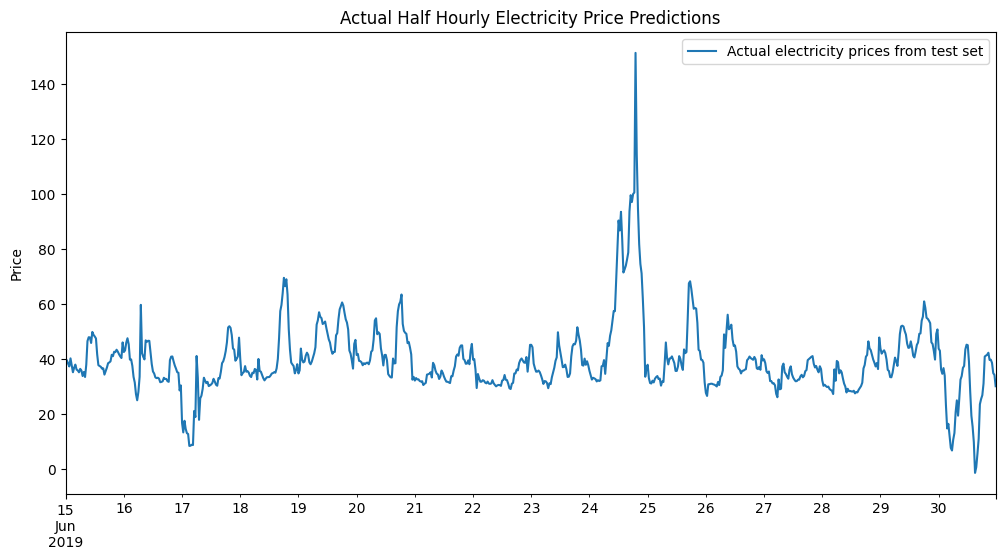

In [ ]:
title = 'Actual Half Hourly Electricity Price Predictions'
ylabel='Price'
xlabel=''
ax = test.rename('Actual electricity prices from test set').plot(legend=True,figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

INDO MODEL - INTIAL DEMAND OUTTURN MODEL

In [ ]:
df = pd.read_csv("/content/Initial-Demand-Outturn.csv",parse_dates=[0])
df.head()
b = dict(zip(range(1, 49),pd.timedelta_range('00:00:00', '23:30:00', freq='30T')))
df['time'] = pd.to_timedelta(df['Settlement Period'].map(b), unit='h')
df.head()

df['datetime'] = pd.to_datetime(df['Settlement Date'] + df['time'])
df.head(10)

df['datetime']=df[['datetime']].drop_duplicates(keep='first')
df.head(50)

df = df.dropna()

In [ ]:
df = df.reset_index().set_index('datetime')
df.head(3)

,index,Settlement Date,Settlement Period,INDO,time
datetime,,,,,
2017-01-01 00:00:00,0,2017-01-01,1,27239,0 days 00:00:00
2017-01-01 00:30:00,1,2017-01-01,2,27814,0 days 00:30:00
2017-01-01 01:00:00,2,2017-01-01,3,27453,0 days 01:00:00


In [ ]:
df = df[['Settlement Period', 'INDO']]
df.head(50)

,Settlement Period,INDO
datetime,,
2017-01-01 00:00:00,1,27239
2017-01-01 00:30:00,2,27814
2017-01-01 01:00:00,3,27453
2017-01-01 01:30:00,4,26312
2017-01-01 02:00:00,5,25289
2017-01-01 02:30:00,6,24616
2017-01-01 03:00:00,7,23654
2017-01-01 03:30:00,8,22806
2017-01-01 04:00:00,9,22234


In [ ]:
df=pd.read_csv('/content/INDO-2017-2019.csv',index_col=[0],parse_dates=[0])
df.head(3)

,Settlement_Period,INDO
datetime,,
2017-01-01 00:00:00,1,27239
2017-01-01 00:30:00,2,27814
2017-01-01 01:00:00,3,27453


In [ ]:
def split_data(data, split_date):
    return data[data.index <= split_date].copy(), \
           data[data.index >  split_date].copy()

def limit(data, frm, to):
    return data[(data.index>=frm)&(data.index<to)]

df.sort_index(inplace=True)

In [ ]:
t = df.INDO.copy()
t = t.drop(t.index[t.index.duplicated()])
freq_index = pd.date_range(start=t.index[0], end=t.index[-1], freq='30T')
constructed = pd.Series(index=freq_index, name='INDO')
constructed.update(t)
constructed.interpolate(inplace=True)

In [ ]:
train = limit(constructed, '2017-01-01', '2019-06-15')
test  = limit(constructed, '2019-06-15', '2019-07-01')
train.shape, test.shape
train.head()

2017-01-01 00:00:00    27239.0
2017-01-01 00:30:00    27814.0
2017-01-01 01:00:00    27453.0
2017-01-01 01:30:00    26312.0
2017-01-01 02:00:00    25289.0
Freq: 30T, Name: INDO, dtype: float64

In [ ]:
df_train=df[df.index.isin(train.index)].copy()
df_test=df[df.index.isin(test.index)].copy()

[Text(0.5, 0, ''), Text(0, 0.5, '')]

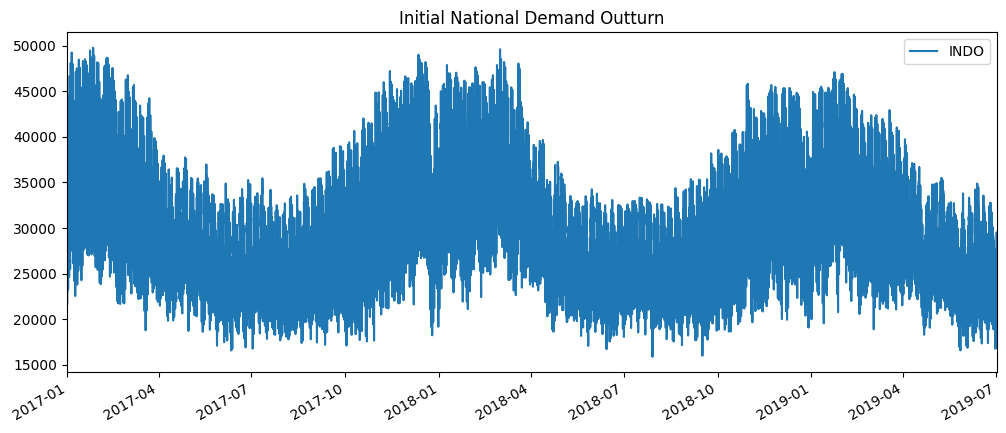

In [ ]:
title = 'Initial National Demand Outturn'
ylabel=''
xlabel=''

ax = df['INDO'].plot(figsize=(12,5),title=title,legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

In [ ]:
df['date'] = df.index
df['hour'] = df['date'].dt.hour
df['dayofweek'] = df['date'].dt.dayofweek
df['quarter'] = df['date'].dt.quarter
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['dayofyear'] = df['date'].dt.dayofyear
df['dayofmonth'] = df['date'].dt.day
df['weekofyear'] = df['date'].dt.weekofyear

def use_features(df):
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    return X
df.head(3)

,Settlement_Period,INDO,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
datetime,,,,,,,,,,,
2017-01-01 00:00:00,1,27239,2017-01-01 00:00:00,0,6,1,1,2017,1,1,52
2017-01-01 00:30:00,2,27814,2017-01-01 00:30:00,0,6,1,1,2017,1,1,52
2017-01-01 01:00:00,3,27453,2017-01-01 01:00:00,1,6,1,1,2017,1,1,52


INDO MODEL USING XGB REGRESSOR

In [ ]:
t = df.INDO.copy()
t = t.drop(t.index[t.index.duplicated()])
freq_index = pd.date_range(start=t.index[0], end=t.index[-1], freq='30T')
constructed = pd.Series(index=freq_index, name='INDO')
constructed.update(t)
constructed.interpolate(inplace=True)

In [ ]:
train = limit(constructed, '2017-01-01', '2019-06-15')
test  = limit(constructed, '2019-06-15', '2019-07-01')
train.shape, test.shape

((42960,), (768,))

In [ ]:
df_train=df[df.index.isin(train.index)].copy()
df_test=df[df.index.isin(test.index)].copy()
df_train.shape,df_test.shape

((42954, 11), (768, 11))

In [ ]:
X_train, y_train = use_features(df_train), df_train['INDO']
X_test, y_test   = use_features(df_test), df_test['INDO']

X_train.shape, y_train.shape, X_test.shape,y_test.shape

((42954, 8), (42954,), (768, 8), (768,))

In [ ]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50, #stop if 50 consequent rounds without decrease of error
        verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

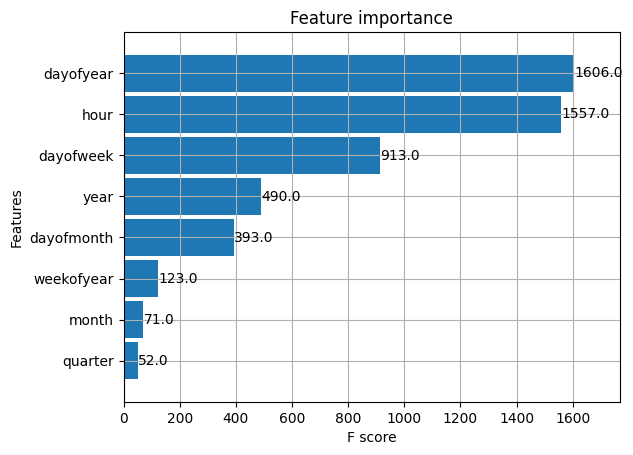

In [ ]:
xgb.plot_importance(reg, height=0.9)

In [ ]:
forecast_xgb= reg.predict(X_test)

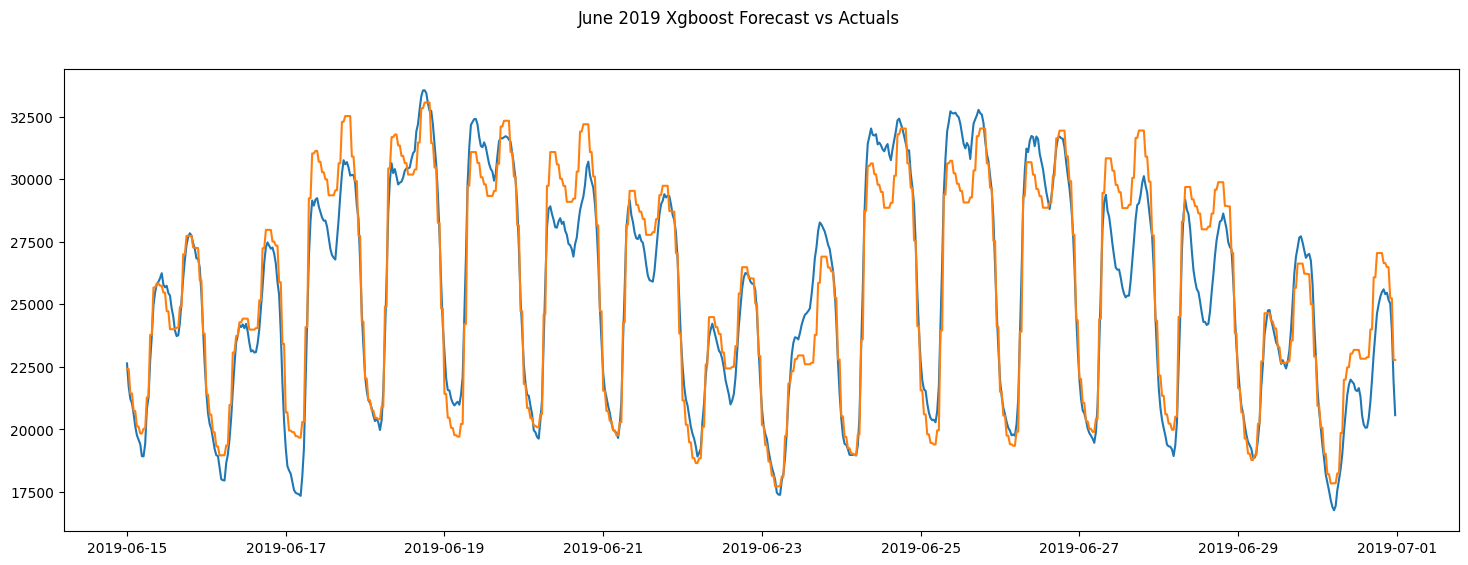

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(test)
plt.plot(df_test.index, forecast_xgb, label='Xgboost')
plot = plt.suptitle('June 2019 Xgboost Forecast vs Actuals')

In [ ]:
from statsmodels.tools.eval_measures import mse,rmse
from sklearn.metrics import mean_absolute_error

error1 = mse(test,forecast_xgb)
error2 = rmse(test,forecast_xgb)

def mean_absolute_percentage_error(y_true,y_pred):
  y_true,y_pred = np.array(y_true),np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) * 100

def smape(true,pred):
  return 100/len(true) * np.sum(2 * np.abs(pred - true)/(np.abs(true)) + (np.abs(pred)))

print(f'MAE Error: {mean_absolute_error(test,forecast_xgb)}')
print(f'MAPE Error: {mean_absolute_percentage_error(test,forecast_xgb)}')
print(f'sMAPE Error:{smape(test,forecast_xgb)}')
print(f'MSE Error:{error1:11.10}')
print(f'RMSE Error:{error2:11.10}')
print()




MAE Error: 1044.3820393880208
MAPE Error: 4.110919281338289
sMAPE Error:2559977.526241232
MSE Error:1819954.617
RMSE Error:1349.056936

